In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rich.progress import track
from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [3]:
jmfile = 'test_008.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1683118721471,352,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,350,0,5,500,200
1,1683118721501,817,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,790,0,4,500,200
2,1683118722319,390,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,389,0,4,500,200


In [4]:
# Beérkezés sorrendje helyett a kiküldés sorrendjében rendezve

jf = jf.sort_values(by='timeStamp', ignore_index=True)

jf = jf.reset_index(drop=True)

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1683118721471,352,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,350,0,5,500,200
1,1683118721501,817,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,790,0,4,500,200
2,1683118722319,390,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,389,0,4,500,200


In [5]:
jf['label'].unique()

array(['HTTP Request'], dtype=object)

In [6]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-28 14:05:24.887360
Second: 24


In [7]:
jf = jf.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1683118721471,352,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,350,0,5,500,200,2023-05-03 12:58:41.471
1,1683118721501,817,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,131,50,50,http://193.225.250.30/cpu/fibonacci/2,790,0,4,500,200,2023-05-03 12:58:41.501


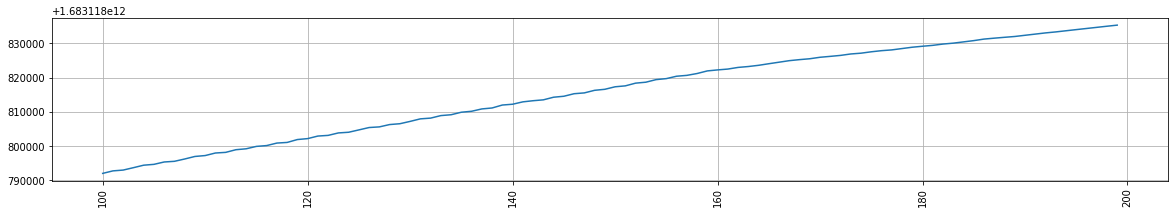

In [8]:
F = 100

plt.figure(figsize=(20, 3))
plt.plot(jf.iloc[F:F+100]['timeStamp'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

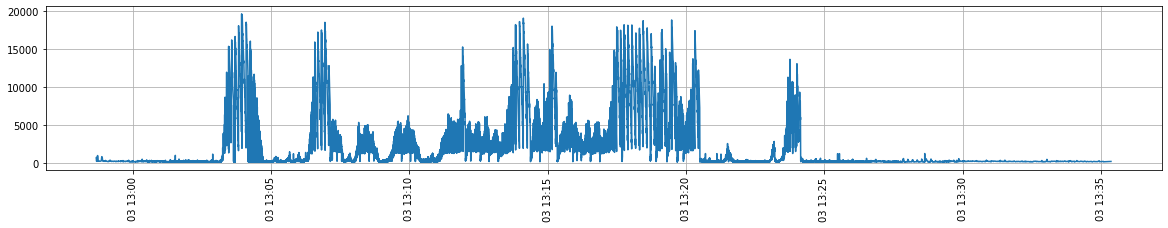

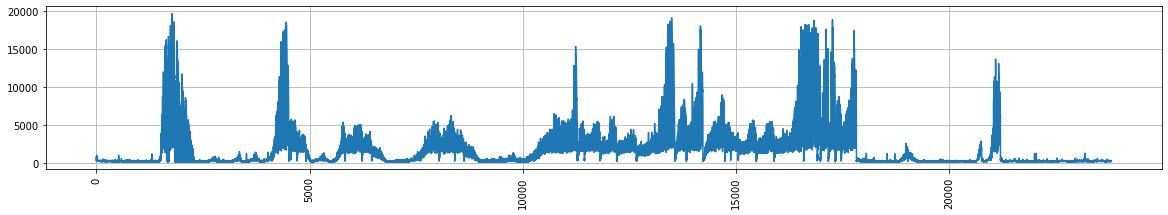

In [9]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

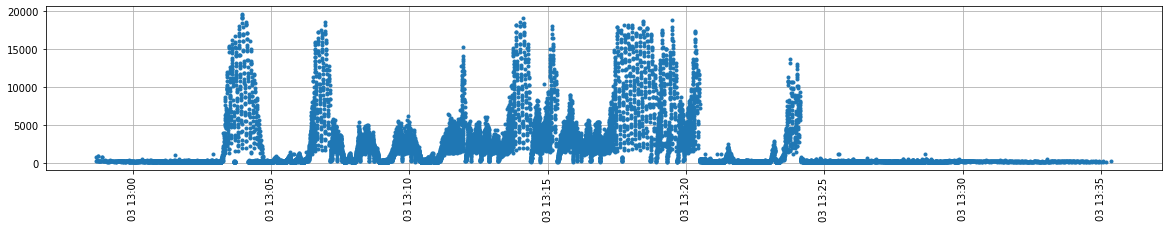

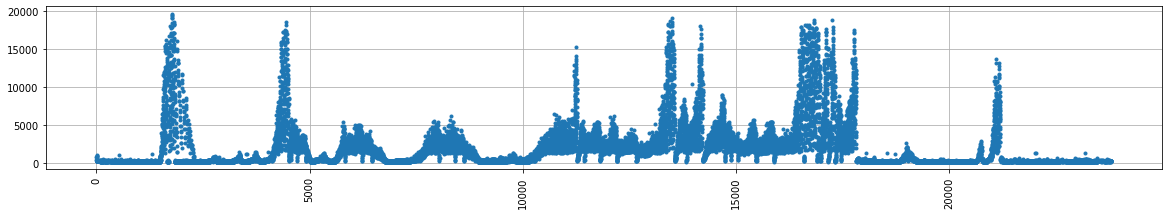

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [11]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

In [12]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


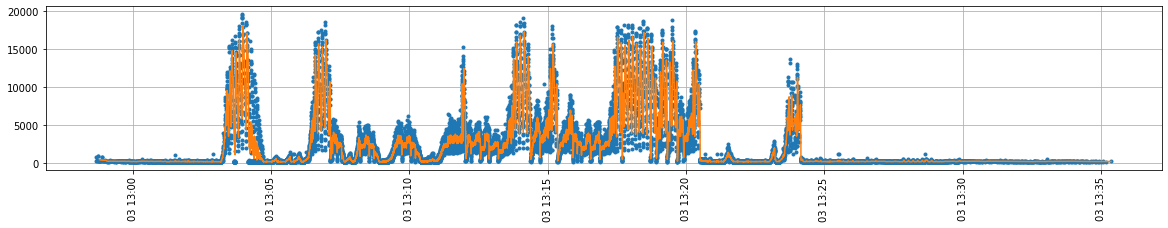

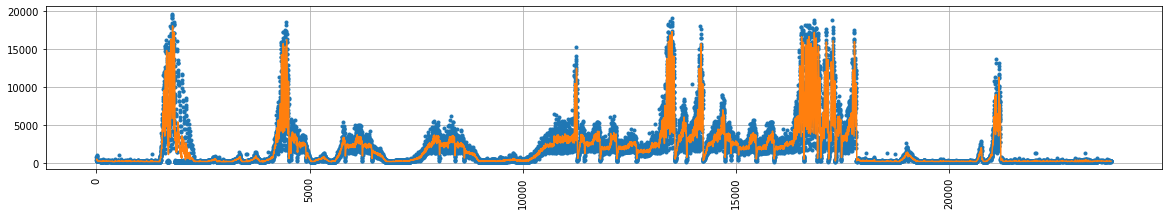

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [14]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
12     289.120690
13    1901.695289
Name: Latency, dtype: float64

In [15]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
0      252.481865
1      232.354486
2      219.118333
3     5098.528302
4     1698.664581
5      318.769096
6     3036.793522
7     1546.055810
8     1611.647646
9     1486.086957
10     770.311598
11    2525.367121
12    2487.449016
13    3032.426429
14    4574.612800
15    3958.127688
16    2381.240129
17    5179.225397
18    8269.398230
19    5676.370937
20    2104.608847
21     387.692900
22     222.401734
23    1904.096296
24     832.670841
25     234.885764
26     240.487923
27     228.558528
28     252.060403
29     239.015075
30     260.246753
31     253.516667
32     229.383333
33     253.300000
34     236.027027
35     224.400000
58     437.571429
59     256.305263
Name: Latency, dtype: float64

In [16]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
12    58       437.571429
      59       256.305263
13    0        252.481865
      1        232.354486
      2        219.118333
      3       5098.528302
      4       1698.664581
      5        318.769096
      6       3036.793522
      7       1546.055810
      8       1611.647646
      9       1486.086957
      10       770.311598
      11      2525.367121
      12      2487.449016
      13      3032.426429
      14      4574.612800
      15      3958.127688
      16      2381.240129
      17      5179.225397
      18      8269.398230
      19      5676.370937
      20      2104.608847
      21       387.692900
      22       222.401734
      23      1904.096296
      24       832.670841
      25       234.885764
      26       240.487923
      27       228.558528
      28       252.060403
      29       239.015075
      30       260.246753
      31       253.516667
      32       229.383333
      33       253.300000
      34       236.027027
      35       224.400000
N

In [17]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

41

In [18]:
jf['hour']   = jf['date'].map(lambda x : x.hour)
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [19]:
md = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [20]:
md

date  date  date
12    58    41      570.0
            42      319.5
            43      999.0
            45      266.0
            46      266.0
                    ...  
13    35    0       225.0
            4       244.0
            5       196.0
            11      214.0
            21      243.0
Name: Latency, Length: 2149, dtype: float64

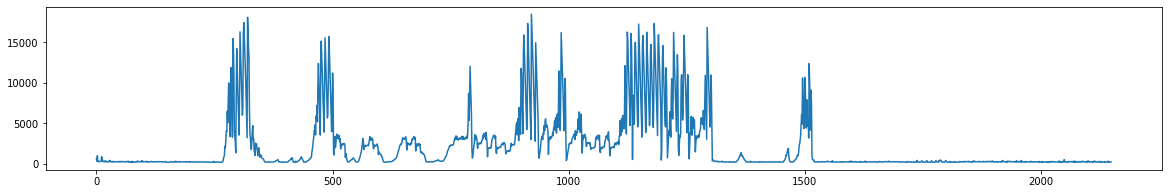

In [21]:
# Másodperc alapő válaszidő átlagok

plt.figure(figsize=(20, 3))
plt.plot(md.values)
plt.show()

In [22]:
_hours   = md.index.levels[0]
_minutes = md.index.levels[1]
_seconds = md.index.levels[2]

_hours_lowest =_hours.min()
_hours_highest = _hours.max()

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))
print(' hrs min %.1d hrs max %.1d' % (_hours_lowest, _hours_highest))

 sec min 0 sec max 59
 min min 0 min max 59
 hrs min 12 hrs max 13


In [23]:
tp = []

start_date = str(jf['date'].loc[0])[:11]

for _ in md.index:
    h = _[0]
    # h = str(_[0]).zfill(2)
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    s = str('%02d' % (_[2],))
    # print(h, m, s)
    tp.append(start_date + str(h) + ':' + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-03 12:58:41,570.0
1,2023-05-03 12:58:42,319.5
2,2023-05-03 12:58:43,999.0
3,2023-05-03 12:58:45,266.0
4,2023-05-03 12:58:46,266.0


In [24]:
mz = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  date  sec
12    58    4      472.363636
            5      399.300000
      59    0      265.909091
            1      275.600000
            2      254.357143
                      ...    
13    34    4      223.000000
            5      252.000000
      35    0      221.666667
            1      214.000000
            2      243.000000
Name: Latency, Length: 221, dtype: float64

In [25]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:11]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    h = _[0]
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    
    if c == 0:
        c += 1
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(_first_sec))
        print(tz)
    else:
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(s*10))
        
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

['2023-05-03 12:58:41']


,date,md
0,2023-05-03 12:58:41,472.363636
1,2023-05-03 12:58:50,399.300000
2,2023-05-03 12:59:00,265.909091
3,2023-05-03 12:59:10,275.600000
4,2023-05-03 12:59:20,254.357143


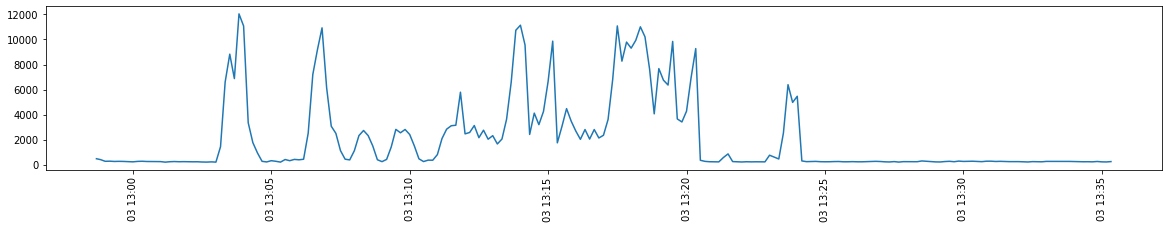

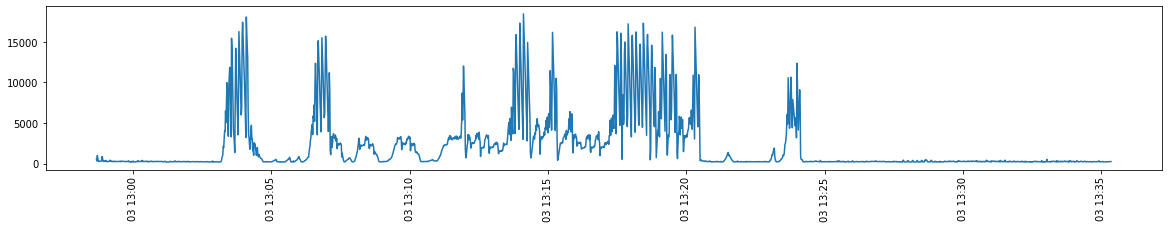

In [26]:
plt.figure(figsize=(20, 3))
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.figure(figsize=(20, 3))
plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [27]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-03 12:58:41
2023-05-03 12:58:41


In [28]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

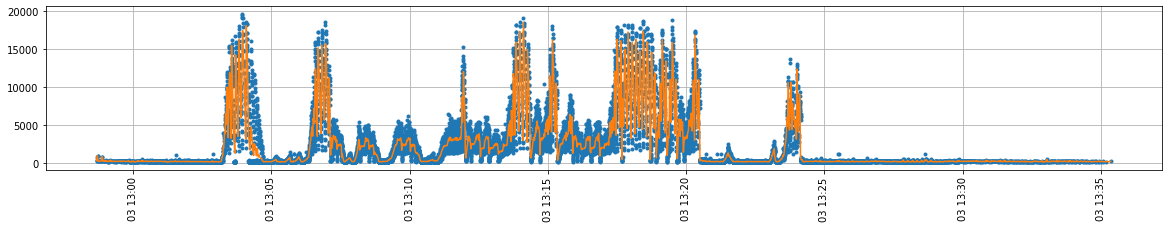

In [29]:
# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

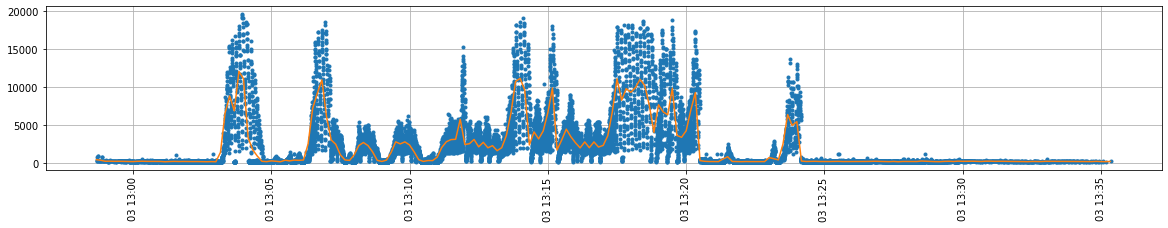

In [30]:
# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

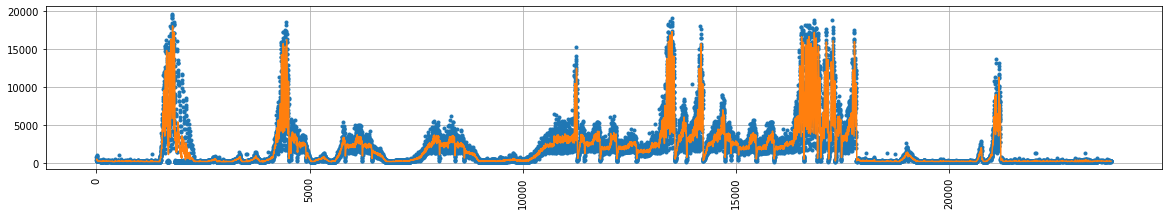

In [31]:
# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)

# Az erre helyezet 10-es mozgóátlag nem az elmúlt 10 mp hanem az utolsó 10 kérés válaszidejének átlaga
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

---

Most van az, hogy jól jönne a **Scaler.log** mert a **Metric.log** csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

A **Scaler.log**-ban csak a skálázáskor kiadott parancs időbélyege van eltárolva.

# Scaler.log - Metric.log - JMeter.log

In [32]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,12:58:36,12:58:3,1149.3470,1149.347000,1,0.1,20.9,66.1,23.6,...,0.0,5.7,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,12:58:43,12:58:4,256.6980,256.698000,3,0.1,24.9,54.1,32.0,...,0.0,11.7,10.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.170,12:58:51,12:58:5,1026.9995,473.945364,4,1.1,22.6,71.0,27.6,...,0.0,11.5,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.170,12:59:01,12:59:0,852.6231,393.610000,6,1.0,10.3,86.7,13.2,...,0.0,4.7,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.170,12:59:11,12:59:1,335.5400,257.874455,5,1.1,12.2,84.5,15.2,...,0.0,8.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
jf[['date']].head(3)

,date
0,2023-05-03 12:58:41.471
1,2023-05-03 12:58:41.501
2,2023-05-03 12:58:42.319


In [34]:
df[['time']].head(3)

,time
0,12:58:3
1,12:58:4
2,12:58:5


In [35]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [36]:
scale_file_name = 'scaled_train_by_none.log'

sf = pd.read_csv(scale_file_name, sep=',', header=0)

display(sf.head(2))

,time,notification,actual_vm_number_was,actual_vm_number_is
0,12:58:36,Worker 192.168.0.116 added.,1,2
1,12:58:36,Worker 192.168.0.46 added.,2,3


In [37]:
print('Scaler.log')
print(sf['time'].iloc[0])
print(sf['time'].iloc[-1])
print(len(sf))

print('JMeter.log')
print(jf['date'].iloc[0])
print(jf['date'].iloc[-1])
print(len(jf))

Scaler.log
12:58:36
13:35:22
279
JMeter.log
2023-05-03 12:58:41.471000
2023-05-03 13:35:21.299000
23804


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [38]:
jf['date']

0       2023-05-03 12:58:41.471
1       2023-05-03 12:58:41.501
2       2023-05-03 12:58:42.319
3       2023-05-03 12:58:42.976
4       2023-05-03 12:58:43.979
                  ...          
23799   2023-05-03 13:35:00.039
23800   2023-05-03 13:35:04.802
23801   2023-05-03 13:35:05.047
23802   2023-05-03 13:35:11.298
23803   2023-05-03 13:35:21.299
Name: date, Length: 23804, dtype: datetime64[ns]

In [39]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0      12:58:36
1      12:58:36
2      12:58:43
3      12:58:51
4      12:58:51
         ...   
274    13:35:01
275    13:35:12
276    13:35:12
277    13:35:22
278    13:35:22
Name: time, Length: 279, dtype: object

In [40]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '
print(start_date)

sf['date'] = start_date + sf['time']
sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-05-03 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,12:58:36,Worker 192.168.0.116 added.,1,2,2023-05-03 12:58:36
1,12:58:36,Worker 192.168.0.46 added.,2,3,2023-05-03 12:58:36
2,12:58:43,Worker 192.168.0.219 added.,3,4,2023-05-03 12:58:43


In [41]:
sf['date']

0     2023-05-03 12:58:36
1     2023-05-03 12:58:36
2     2023-05-03 12:58:43
3     2023-05-03 12:58:51
4     2023-05-03 12:58:51
              ...        
274   2023-05-03 13:35:01
275   2023-05-03 13:35:12
276   2023-05-03 13:35:12
277   2023-05-03 13:35:22
278   2023-05-03 13:35:22
Name: date, Length: 279, dtype: datetime64[ns]

In [42]:
jf['date']

0       2023-05-03 12:58:41.471
1       2023-05-03 12:58:41.501
2       2023-05-03 12:58:42.319
3       2023-05-03 12:58:42.976
4       2023-05-03 12:58:43.979
                  ...          
23799   2023-05-03 13:35:00.039
23800   2023-05-03 13:35:04.802
23801   2023-05-03 13:35:05.047
23802   2023-05-03 13:35:11.298
23803   2023-05-03 13:35:21.299
Name: date, Length: 23804, dtype: datetime64[ns]

In [43]:
jf['date'].iloc[3]

Timestamp('2023-05-03 12:58:42.976000')

In [44]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [45]:
jf['dates'].iloc[3]

Timestamp('2023-05-03 12:58:42')

In [46]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

# Sajnos ez a megoldás ezen az adatbázison nem lesz jó

# -----------------------------------------------------


# Bár most azok után, hogy rendeztem az adatokat a time
# szerint már lehet, hogy jó lesz


_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in track(range(jf['Latency'].shape[0])):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]
    
    if c < len(sf):
        if jf_date == _current_scale_date:
            # print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
3


# Kiegészítés

Itt akadtam meg már a 26,25,24-ben lefutott erre it megkadat az algoritmus,
ami a JMeter.csv és a Scaler.log alapján a JMeter.csv-hez rendeli a megfelelő
időpontban a megfelelő Worker számokat.

Az algo azért akad meg, mert van egy pont amikor skálázás volt a Scaler.log
timestamp alapján viszont abban az időpontban a JMeter.log nem rögzített értéket
ezért azon a ponton eltörik az algo.

    14 	06:54:30 	Worker 192.168.0.192 removed. 	3 	2 	2023-05-20 06:54:30
    15 	06:54:41 	Worker 192.168.0.220 removed. 	2 	1 	2023-05-20 06:54:41
    16 	06:54:57 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 06:54:57
    17 	06:54:57 	Worker 192.168.0.91 added. 	2 	3 	2023-05-20 06:54:57
    18 	06:54:57 	Worker 192.168.0.93 added. 	3 	4 	2023-05-20 06:54:57
    
valhol itt.

In [47]:
# Van e bárhol ilyen dátum?

answer = []
where = []

for date in sf['date']:
    # print(date)
    # found = (jf['dates'] == '2023-05-21 09:22:03').any(axis=0)
    found = (jf['dates'] == date).any(axis=0)
    answer.append(found)
    if found == False:
        where.append(date)

# print(set(answer))

print('Azok az Scaler.log dátumok amelyek nincsenek benne JMeter.log-ban:')
for _ in where: print(_)

Azok az Scaler.log dátumok amelyek nincsenek benne JMeter.log-ban:
2023-05-03 12:58:36
2023-05-03 12:58:36
2023-05-03 13:34:42
2023-05-03 13:34:53
2023-05-03 13:35:01
2023-05-03 13:35:01
2023-05-03 13:35:12
2023-05-03 13:35:12
2023-05-03 13:35:22
2023-05-03 13:35:22


In [48]:
default = {
    'timeStamp': np.nan,
    'elapsed': np.nan,
    'label': '',
    'responseCode': np.nan,
    'responseMessage': np.nan,
    'threadName': '',
    'dataType': '',
    'success': False,
    'failureMessage': np.nan,
    'bytes': np.nan,
    'sentBytes': np.nan,
    'grpThreads': np.nan,
    'allThreads': np.nan,
    'URL': '',
    'Latency': np.nan,
    'IdleTime': np.nan,
    'bytes': np.nan,
    'Connect': np.nan,
    'RT_LIMIT_UPPER': np.nan,
    'RT_LIMIT_LOWER': np.nan,
    'date': '',                   # ez lesz majd beszúrva datetime64[ns]
    '_x': np.nan,
    'ma10rt': np.nan,
    'hour': np.nan,
    'minute': np.nan,
    'second': np.nan,
    'sec': np.nan,
    'dates': '',                  # ez lesz madj beszúrva datetime64[ns]
    'sf_vm': np.nan,              # ez lesz majd beszúva (int64)
}


af = jf.copy()

# for _ in af.columns:
#     print(_, af[_].dtype)
    

    # Tehát a feladat az, hogy végig iteráljak az 'Scaler.log' on és ha olyan dátum van ami nincs benne a
    # JMeter.log-ban akkor azt egyem bele

for missing_date in where:
    print(missing_date)
    d = missing_date
    
    # Fölösleges mivel a missing_date már elefe datetime object
    # d = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')

    row = {'date': d, 'dates': d}

    af = af.append({**default, **row}, ignore_index=True)

# Mivel az új dátumok a DataFrame végére kerülnek ezért ismét rendezni kell őket (date és timeStamp alapján)
#  vagy egyszerűen a date alapján mert az lett konvertálva a timeStampből és örzi a milisec információkat is

af = af.sort_values(by='date', ignore_index=True)

af = af.reset_index(drop=True)

af.head(3)


2023-05-03 12:58:36
2023-05-03 12:58:36
2023-05-03 13:34:42
2023-05-03 13:34:53
2023-05-03 13:35:01
2023-05-03 13:35:01
2023-05-03 13:35:12
2023-05-03 13:35:12
2023-05-03 13:35:22
2023-05-03 13:35:22


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,NaN,NaN,,NaN,NaN,,,False,NaN,NaN,...,NaN,2023-05-03 12:58:36.000,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-03 12:58:36,NaN
1,NaN,NaN,,NaN,NaN,,,False,NaN,NaN,...,NaN,2023-05-03 12:58:36.000,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-03 12:58:36,NaN
2,1.683119e+12,352.0,HTTP Request,200.0,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,322.0,...,200.0,2023-05-03 12:58:41.471,0.0,NaN,12.0,58.0,41.0,4.0,2023-05-03 12:58:41,1.0


In [49]:
# Van e bárhol ilyen dátum de most az af-ben, elvileg kéne, hogy legyen

for _ in sf['date'].iloc[-10:]:
    res_af = (af['dates'] == _).any(axis=0) # itt vann, hogy melyik dátum az ami nincs a sf-ben
    res_jf = (jf['dates'] == _).any(axis=0) # itt vann, hogy melyik dátum az ami nincs a jf-ben
    print(_, res_af, res_jf)

2023-05-03 13:34:30 True True
2023-05-03 13:34:30 True True
2023-05-03 13:34:42 True False
2023-05-03 13:34:53 True False
2023-05-03 13:35:01 True False
2023-05-03 13:35:01 True False
2023-05-03 13:35:12 True False
2023-05-03 13:35:12 True False
2023-05-03 13:35:22 True False
2023-05-03 13:35:22 True False


In [50]:
print(len(af))
print(len(jf))

23814
23804


In [51]:
# Van e bárhol ilyen dátum?

(af['dates'] == '2023-05-07 20:08:33').any(axis=0)

False

## Kurva jó lenne rájönnöm, hogy hol a faszba csúszik el ez a geci

    # meg van, hogy hol a hiba ha egy jf időpontból csak egy van de a hozzá tartozó sf időpotnból több
    # mert abban az időpontban több vm-et is hozzáadott, akkor az sf-be azonos idővel került be
    # akkor a következő körben már tovább ugrik a következő jf-re és lehet hogy az ahhoz tartozó
    # időpont már nem azonos a következő sf időponttal ezért soha többé nem teljesül az af_date == _current_date
    # feltétel,
    # Ezért amikor ez a feltétel elöször teljesül
    # akkor végig kell iterálni az sf-en annyiszor amig új időpontot nem érzékel az sf-ben

In [52]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)
print(_len_sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

print(_first_scale_date)
print(_current_scale_date)

print(af['date'].iloc[0])
print(af['dates'].iloc[0])

af['sf_vm'] = -1

c = 0

print(af['Latency'].shape[0])

for i in track(range(af['Latency'].shape[0])):
    af['sf_vm'].iloc[i] = _current_vm_number

    af_date = af['dates'].iloc[i]
    
    if c < len(sf):
        if af_date == _current_scale_date:
            # print('    Scale', af_date, _current_scale_date, _current_vm_number, i, c)
            # print('-', af_date, '-')
            # print('+', _current_scale_date, '+')
            # print('v', _current_vm_number, 'v')
            # print('c', c, 'c')
            # print('i', i, 'i')
            # addig iteráljon amig asz sf dátuma nem változk, akkor álta át a _current_scale_date-t
            
            u = True
            while u == True:
                
                if c + 1 >= len(sf):
                    break
                
                if c + 1 < len(sf):
                    # olvassa ki az sf[c]-hez tartozó dátumot (de ne most)

                    # olvassa ki a vm_numbert
                    _current_vm_number = sf['actual_vm_number_is'].iloc[c]

                    #
                    if sf['date'].iloc[c] != sf['date'].iloc[c + 1]:
                        u = False
                        _current_scale_date = sf['date'].iloc[c + 1]

                    c += 1
                    # print(c)
                    # print(i)
            


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
3
279
2023-05-03 12:58:36
2023-05-03 12:58:36
2023-05-03 12:58:36
2023-05-03 12:58:36
23814


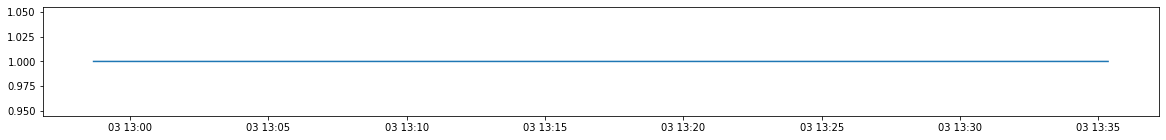

In [53]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

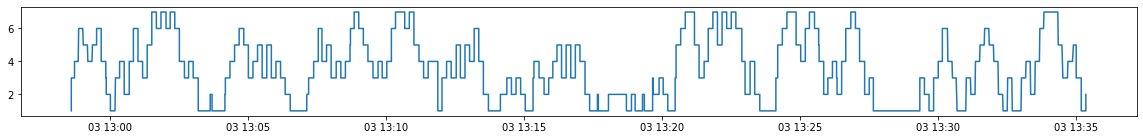

In [54]:
# Dátum alapján rendezet af

plt.figure(figsize=(20,2))
plt.plot(af['dates'], af['sf_vm'])
plt.show()

In [55]:
sf.iloc[10:20].head(100)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
10,12:59:41,Worker 192.168.0.46 removed.,5,4,2023-05-03 12:59:41
11,12:59:51,Worker 192.168.0.219 removed.,4,3,2023-05-03 12:59:51
12,12:59:52,Worker 192.168.0.233 removed.,3,2,2023-05-03 12:59:52
13,13:00:01,Worker 192.168.0.230 removed.,2,1,2023-05-03 13:00:01
14,13:00:11,Worker 192.168.0.116 added.,1,2,2023-05-03 13:00:11
15,13:00:11,Worker 192.168.0.46 added.,2,3,2023-05-03 13:00:11
16,13:00:21,Worker 192.168.0.219 added.,3,4,2023-05-03 13:00:21
17,13:00:31,Worker 192.168.0.116 removed.,4,3,2023-05-03 13:00:31
18,13:00:31,Worker 192.168.0.46 removed.,3,2,2023-05-03 13:00:31
19,13:00:42,Worker 192.168.0.116 added.,2,3,2023-05-03 13:00:42


<h2> <font color="red">Vannak durva anomáliák</font> </h2>

Például ez hogy lehetséges?

    154 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01
    155 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01

Bele néztem a train_by_none.py kódba is és nem tudom az okát

---

Amúgy érdkes, hogy milyen időpontokban ad hozzá, vesz el vm-ket.

Megnéztem a programot amit írtam és akkor kerül bele a **Scale.log** filébe a bejegyzés és az időbélyeg,
amikor kiadta a skálázási parancsot.

Ez az esetek többségében 10-ik másodperc valahányszorosa.

Nem elfelejteni, hogy a tanulóadatok előállításánál nincs semmilyen számátás ami miatt késne a rendszer.

Ezért az a gyanúm, hogy a tényleges skálázásnál ez már nem így lesz.

Ennek ellenére látok néhány adatot amikor példul

    92 	09:33:50 	Worker 192.168.0.73 removed.
    93 	09:34:02 	Worker 192.168.0.73 added.

Nem teljesen értem, hogy a faszba fordulhatott elő, hogy két máodperc múlva is meg lett hívva ez az eljárás.

Ezért ennek most egy picit utána nézek.

## Sajnos meg is fejtettem az okát.

Ugye amikor túl van terhelve a rendszer akkor később érkezik be egy válaszidő ezért és mivel az egész rendszer akkor triggerelődik amikor bejön egy válaszidő ezért van ez a csúszkálás.

Ez megoldódna ha minden 10-ik másodpercben lefutna a rendszer de jelenleg nem így működik, és most még nem is foglalkozom vele, hogy átírjam a rendszert.

In [56]:
sf_second = sf['date'].dt.second

np.unique(sf_second, return_counts=True)

(array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 18, 20, 21, 22, 23, 29,
        30, 31, 32, 33, 36, 38, 40, 41, 42, 43, 44, 50, 51, 52, 53, 54]),
 array([26,  7,  3,  1,  1,  3,  1,  5, 19, 19,  3,  3,  3, 28, 14,  3,  4,
         2, 23, 11,  8,  2,  1,  8, 22, 13,  6,  1,  1, 19, 10,  4,  5]))

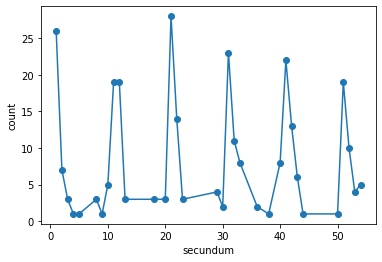

In [57]:
_ = np.unique(sf_second, return_counts=True)

plt.scatter(_[0], _[1])
plt.plot(_[0], _[1])
plt.xlabel('secundum')
plt.ylabel('count')
plt.show()

# többségében 10 valahányszorosára jön ki a skálázás, de sok olyan eset is van amikor nem.

In [58]:
# Van e bárhol ilyen dátum?

(jf['dates'] == '2023-05-21 09:22:03').any(axis=0)

False

In [59]:
jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1683118721471,352,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-1,text,True,NaN,322,...,200,2023-05-03 12:58:41.471,0,NaN,12,58,41,4,2023-05-03 12:58:41,1
1,1683118721501,817,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,...,200,2023-05-03 12:58:41.501,1,NaN,12,58,41,4,2023-05-03 12:58:41,1
2,1683118722319,390,HTTP Request,200,NaN,bzm - Concurrency Thread Group-ThreadStarter 1-15,text,True,NaN,322,...,200,2023-05-03 12:58:42.319,2,NaN,12,58,42,4,2023-05-03 12:58:42,1


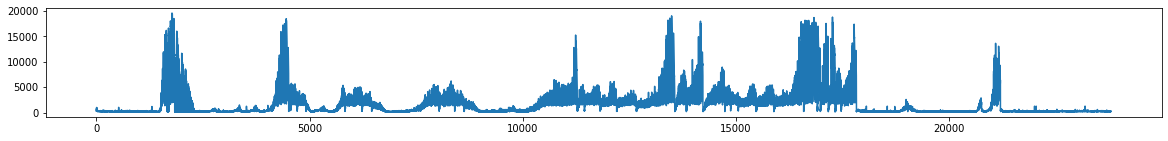

In [60]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['Latency'])
plt.show()

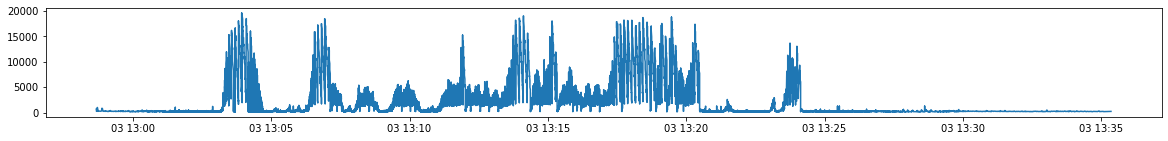

In [61]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['Latency'])
plt.show()

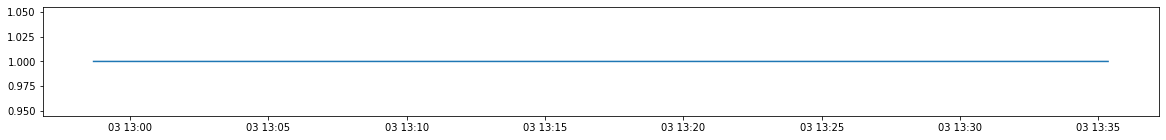

In [62]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

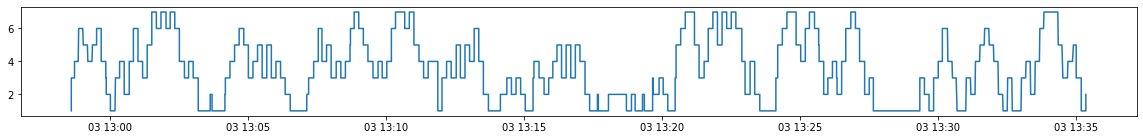

In [63]:
# Dátum alapján rendezet af

plt.figure(figsize=(20,2))
plt.plot(af['dates'], af['sf_vm'])
plt.show()

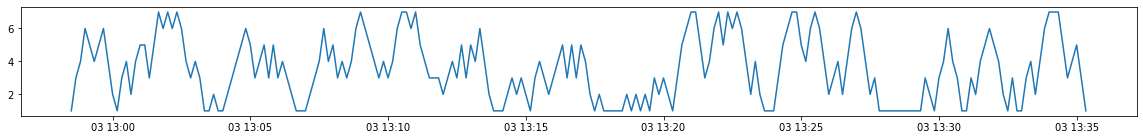

In [64]:
# Metric.log-ból kiolvasott VM Number

plt.figure(figsize=(20,2))
plt.plot(df['nntime'], df['worker_number'])
plt.show()

In [65]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


## Ezt feljebb már megcsináltam

De most itt hagyom mert csak plottolás

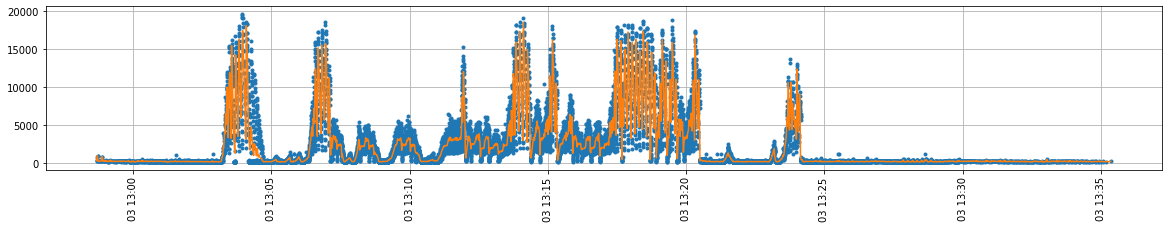

In [66]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Ezen dolgoztam

Hogy a JMeter.log és a Metric.log vagyis Scale.log wm_number egy df-be és egy ábrára kerüljenek.

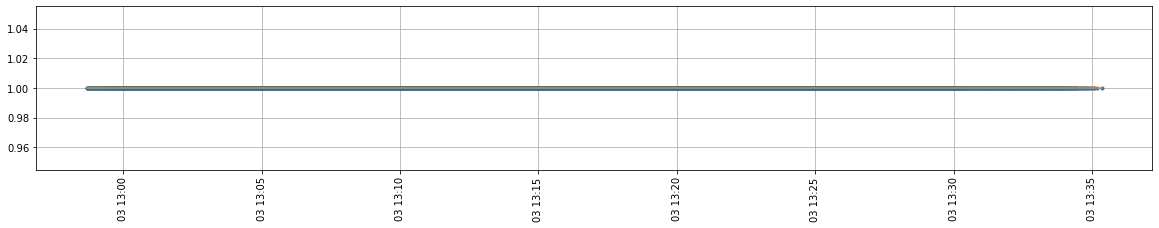

In [67]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

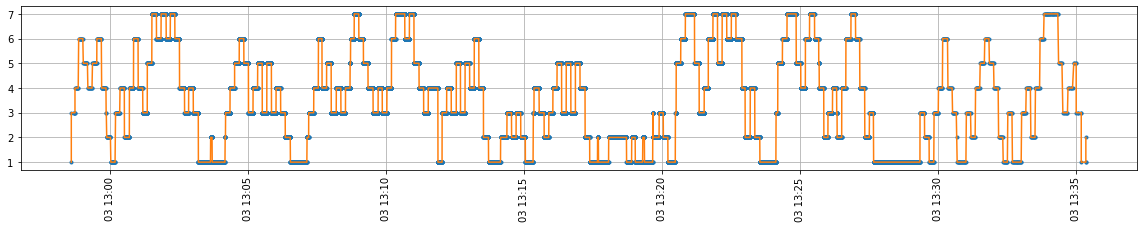

In [68]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
plt.plot(af['date'], af['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [69]:
# Ellenőrzés (felületes)

sf.tail(5)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
274,13:35:01,Worker 192.168.0.46 removed.,4,3,2023-05-03 13:35:01
275,13:35:12,Worker 192.168.0.230 removed.,3,2,2023-05-03 13:35:12
276,13:35:12,Worker 192.168.0.243 removed.,2,1,2023-05-03 13:35:12
277,13:35:22,Worker 192.168.0.116 added.,1,2,2023-05-03 13:35:22
278,13:35:22,Worker 192.168.0.46 added.,2,3,2023-05-03 13:35:22


## Ezen dolgoztam

A két logfiléből kinyert adat együtt - JMeter.log és Scale.log vm_number

**tp\['date'\]** és **tp\['md'\]** a JMeter.log-ból számolt másodpercekre lebontott átlagú **Latency** a JMetric.log-ból.

**jf\['date'\]** és **jf\['sf_vm'\]** a Scaler.log alapján a JMeter df-be létrehozott **Worker Number**

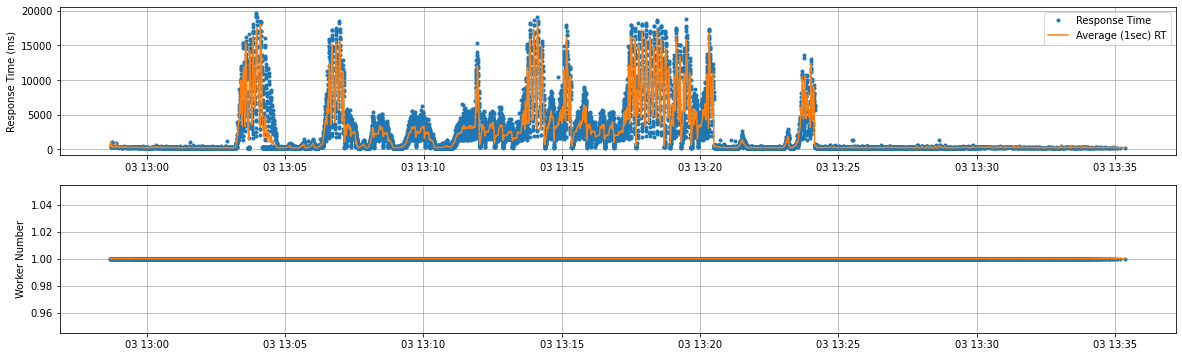

In [70]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

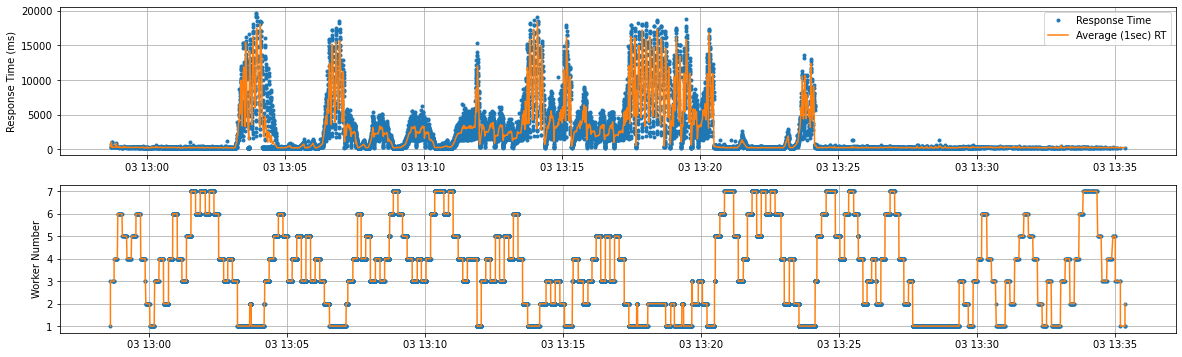

In [71]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(af['date'], af['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
ax1.plot(af['date'], af['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## A jf alapján meg lehet nézni mindkét API-t

A jf alapján meg lehet nézni mindkét API-t?

In [72]:
jf['label'].unique()

array(['HTTP Request'], dtype=object)

## JMeter.log alapján

A két REST API 10 másodpercenként mért átlagos válaszideje - a **JMeter.csv** alapján.

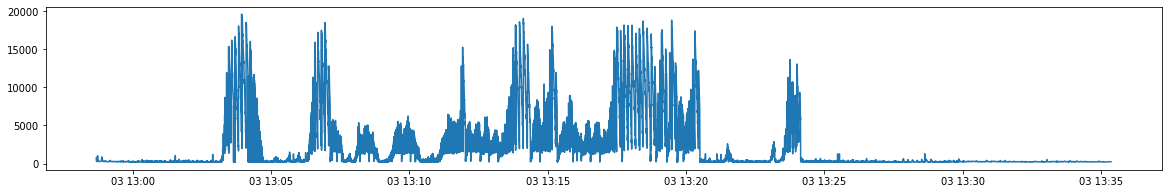

In [73]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.show()

## JMeter.log és Scaler.log alapján

Mellé teszem a **Scaler.log** alapján kinyert **worker_number** válotzót is.

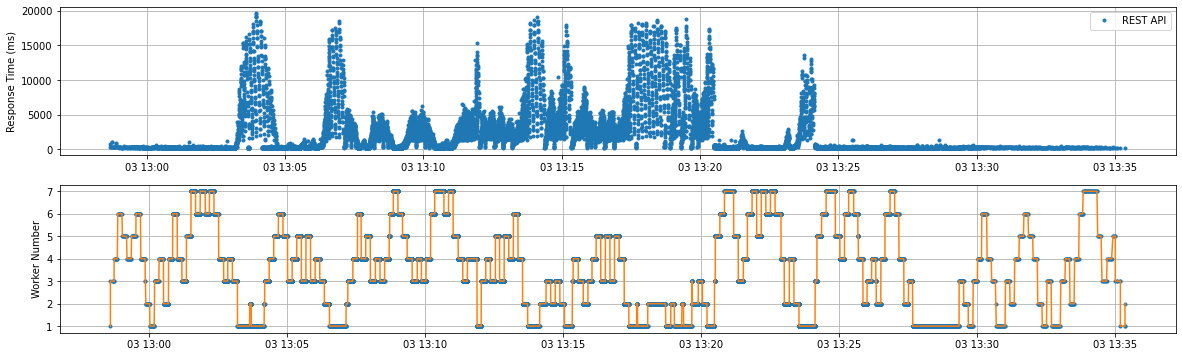

In [74]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='REST API')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
ax1.plot(af['date'], af['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test26 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

## Fontos

Ami itt kövektezik, az nem lehet annyira pontos mint a JMeter.log és a Scaler.log alapján összerakott megoldás.

**Miért?**

Mert a Metric.log filokban a MyLog.log fileből és az Access.log-ból kinyert és 10 másodpercre aggregált átlagok vannak.

**Megjegyzés:**

A **Metric.log** fájlba az idő **HH:MM:S** formátumba kerül. Ezért még hozzá kell adnom az **Y-m-d** adatot és egy **0**-t a **s** mögé.

Azt viszont, hogy mi volt az **Év-Hónap-Nap** a **Metric.log** filéből nem lehet megtudni, de ha rendesen tároltam el a teszt mérési eredményket akkor a könyvtárban ott van a **JMeter.csv** file is amiben viszont benne van a dátum.

Ha egy mérés nem csúszik át egyik napból a másikba akkor egyszerűen ki lehet olvani a **JMeter.csv** file első sorából a dátumot és azt beilleszteni a **Metric.log** adataiba.

Egyszerűbb lett volna, ha a **Metric.log** készítésénél beillesztem a dátumot is amikor a mérés zajlik de most már így alakult és nem fogok 26 mérést újra csinálni.

In [75]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


## Csak a Metric.log alapján

Ennél a megoldásnál jobb az amelyiket a **JMeter.csv** és a **Scaler.log** alapján raktam össze, mert sokkal nagyobb a felbontása (kérés alapú, vagy másodperc alapú)

De mivel a metrikákat és a tényleges döntéseket is ez alapján hozza meg az optimizer ezért látni akarom ezt is.

Itt viszont REST API-ra szétbontva nézem meg a válaszidő és a virtuális gépek számának alakulását a tisztán a **Metric.log** alapján.

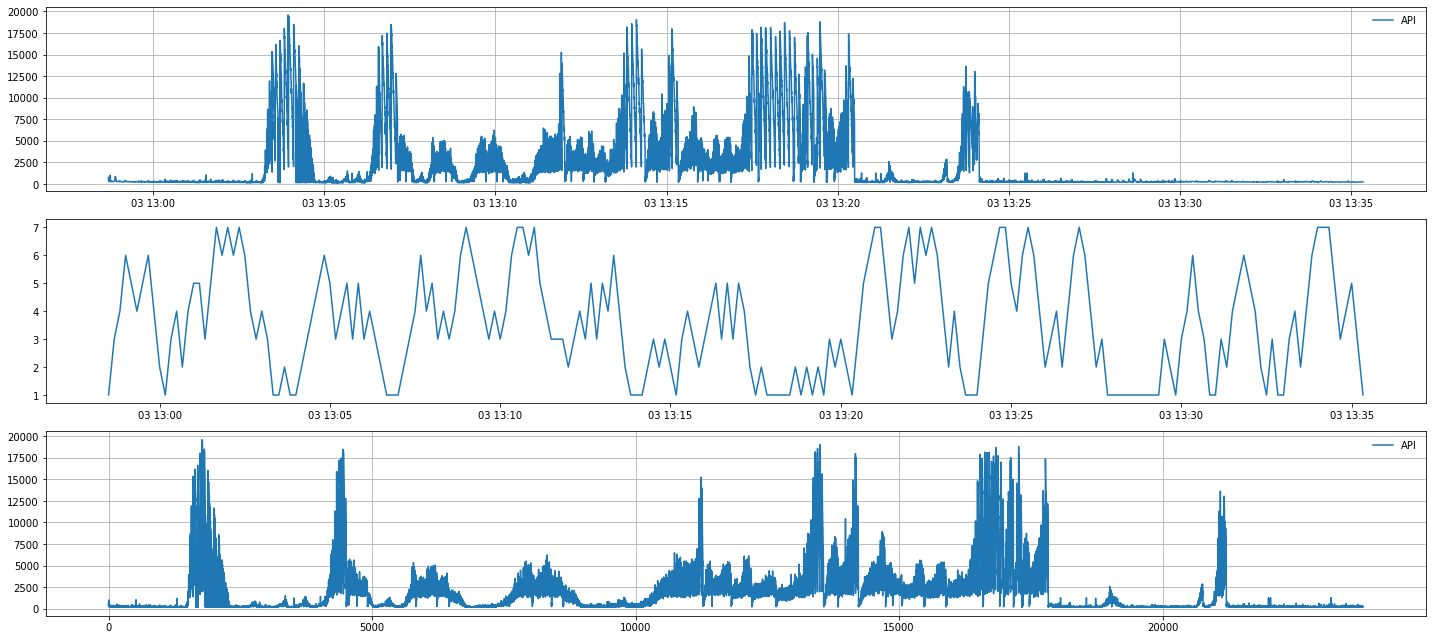

In [76]:
# Teljesen jó,

# ---

# Kiegészítés

# Azért ez még mindíg nem tökéletes

# Az igazi az lenne ha a scaler.log-ból olvasnám ki, hogy mikor volt skálázás és azt tenném rá.


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(jf['date'], jf['Latency'], marker=marker, linewidth=linewidth, label='API')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(jf['Latency'], marker=marker, linewidth=linewidth, label='API')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

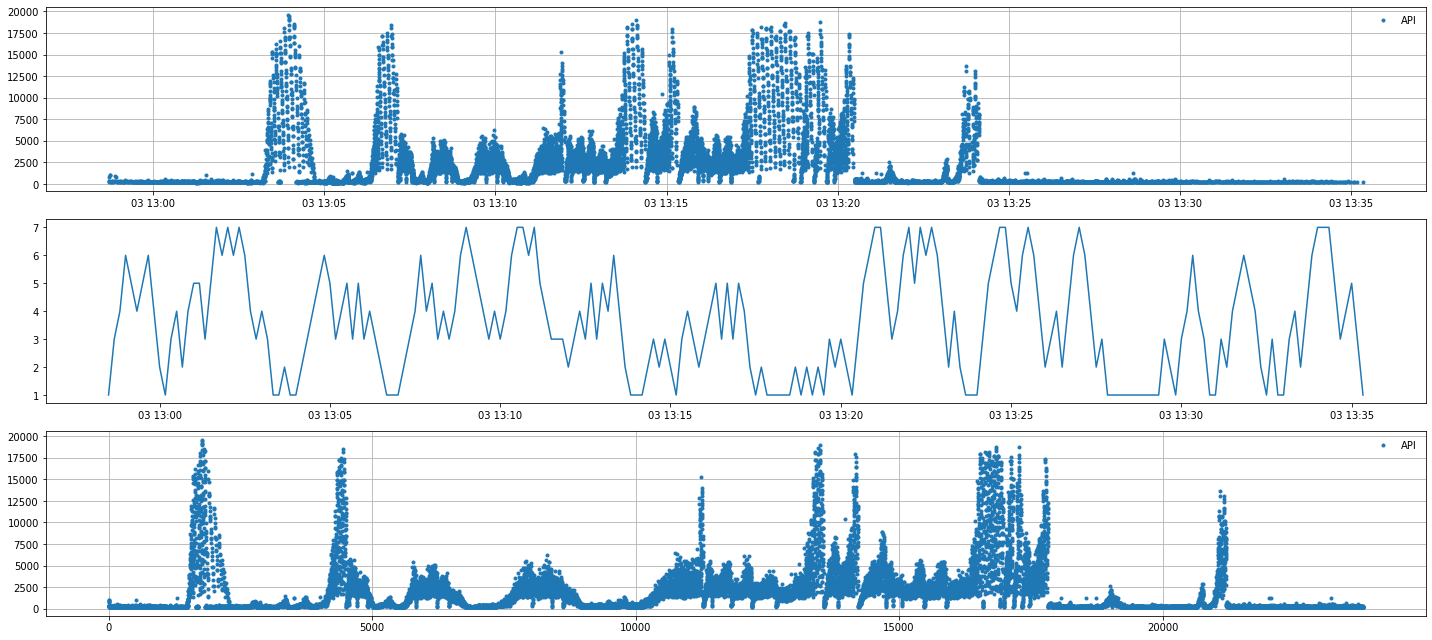

In [77]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [79]:
start_date = '2023-05-03 13:00'
end_date = '2023-05-03 13:50'

mask = (jf['date'] > start_date) & (jf['date'] <= end_date)
J = jf.loc[mask]

J.shape

(23688, 28)

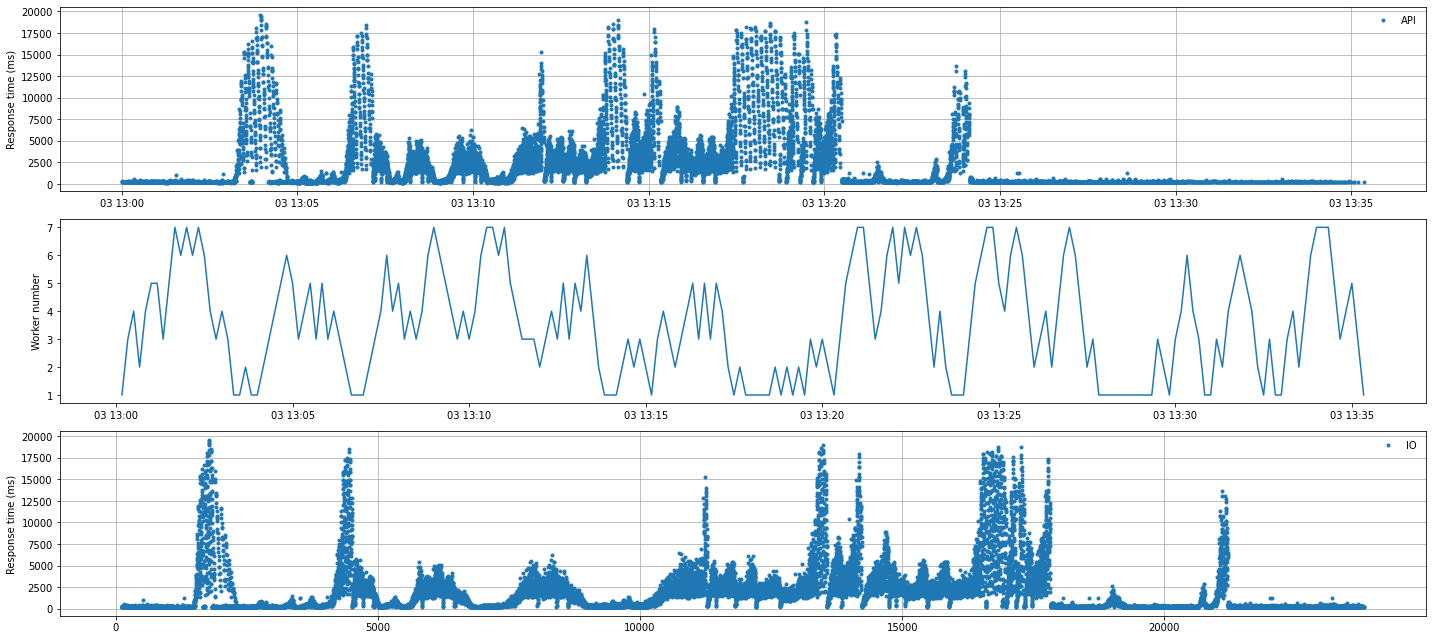

In [81]:
def zoom(start_date, end_date):

    mask = (jf['date'] > start_date) & (jf['date'] <= end_date)
    J = jf.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(J['date'], J['Latency'], marker='.', linewidth=0, label='API')
    ax0.set_ylabel('Response time (ms)')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.set_ylabel('Worker number')
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(J['Latency'], marker='.', linewidth=0, label='IO')
    ax2.set_ylabel('Response time (ms)')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-03 13:00', '2023-05-03 13:50')

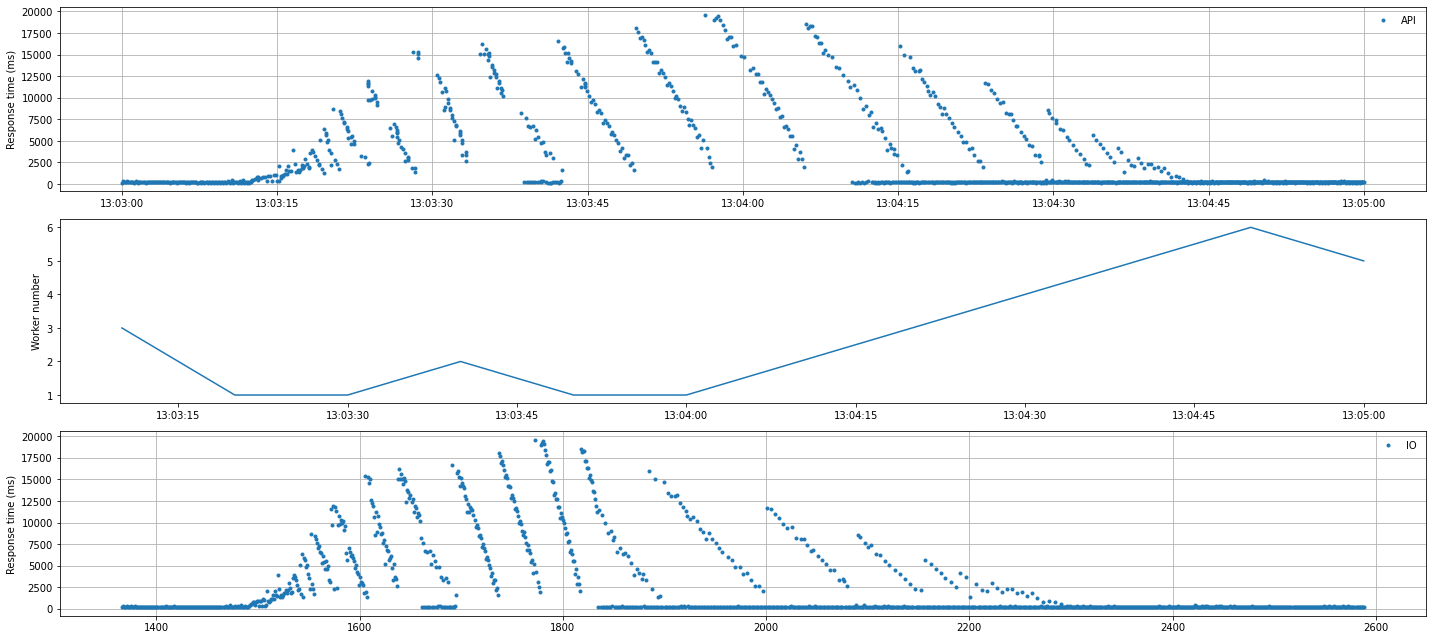

In [84]:
zoom('2023-05-03 13:03', '2023-05-03 13:05')

## Helpers

In [81]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)


<class 'datetime.datetime'>
2023-05-17 13:55:26
